# **Covid 19 Vaccination Data Analysis**
Dataset 1: https://www.kaggle.com/datasets/padmajabuggaveeti/covid-vaccination-dataset-2021

Dataset 2: https://www.kaggle.com/datasets/gpreda/covid-world-vaccination-progress

In [122]:
import pandas as pd
import numpy as np
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import IFrame

In [123]:
# Load the dataset
df1 = pd.read_csv('country_vaccinations.csv')
df2 = pd.read_csv('country_vaccinations_by_manufacturer.csv')
df3 = pd.read_csv('vaccinations.csv')

In [124]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(86512, 15)
(35623, 4)
(1662, 12)


## **Dataset 1: Vaccinations by Country**

In [125]:
df1.head(2)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [126]:
df1.columns.tolist()

['country',
 'iso_code',
 'date',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'daily_vaccinations_raw',
 'daily_vaccinations',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'daily_vaccinations_per_million',
 'vaccines',
 'source_name',
 'source_website']

In [127]:
# List of columns to check for null values
columns_to_check1 = [
    'country',
    'iso_code',
    'date',
    'total_vaccinations',
    'people_vaccinated',
    'people_fully_vaccinated',
    'daily_vaccinations_raw',
    'daily_vaccinations',
    'total_vaccinations_per_hundred',
    'people_vaccinated_per_hundred',
    'people_fully_vaccinated_per_hundred',
    'daily_vaccinations_per_million',
    'vaccines',
    'source_name',
    'source_website'
]

# Check for null values in the specified columns
null_values1 = df1[columns_to_check1].isnull().sum()

# Display the result
print("Null values in each column:")
print(null_values1)

Null values in each column:
country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64


In [153]:
# Drop rows with null values in the specified columns
dfc1 = df1.dropna(subset=columns_to_check1)

# Display the cleaned DataFrame
print("DataFrame after dropping null values:\n")
dfc1.head()

DataFrame after dropping null values:



,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
94,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,2859.0,6487.0,1.49,1.20,0.29,163.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
101,Afghanistan,AFG,2021-06-03,630305.0,481800.0,148505.0,4015.0,5285.0,1.58,1.21,0.37,133.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
339,Afghanistan,AFG,2022-01-27,5081064.0,4517380.0,3868832.0,6868.0,9802.0,12.76,11.34,9.71,246.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
433,Albania,ALB,2021-02-18,3049.0,2438.0,611.0,1348.0,254.0,0.11,0.08,0.02,88.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
515,Albania,ALB,2021-05-11,622507.0,440921.0,181586.0,9548.0,12160.0,21.67,15.35,6.32,4233.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


In [129]:
print(df1.shape)
print(dfc1.shape)

(86512, 15)
(30847, 15)


### **Vaccination Coverage Comparison Among Countries**

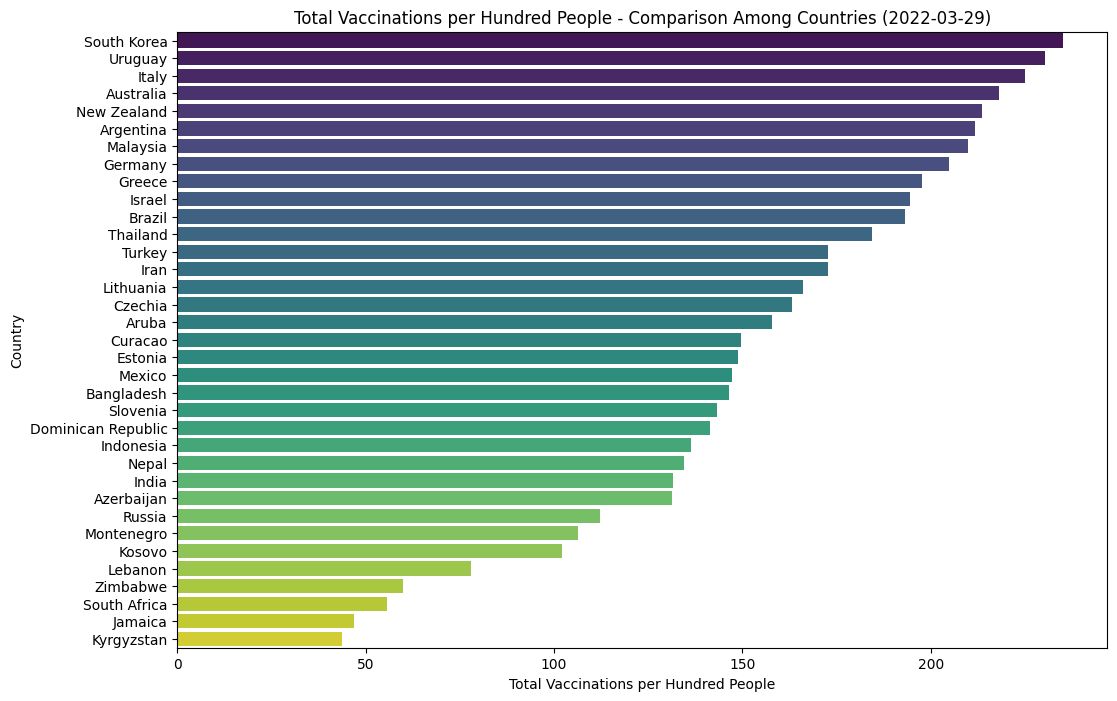

In [146]:
# Select the latest date for comparison
latest_date = dfc1['date'].max()
latest_data = dfc1[dfc1['date'] == latest_date]

# Sort data by total vaccinations per hundred in descending order
sorted_data = latest_data.sort_values(by='total_vaccinations_per_hundred', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='total_vaccinations_per_hundred', y='country', data=sorted_data, palette='viridis')

plt.title(f'Total Vaccinations per Hundred People - Comparison Among Countries ({latest_date})')
plt.xlabel('Total Vaccinations per Hundred People')
plt.ylabel('Country')
plt.show()

Enter the country name: Sri Lanka


<ipython-input-157-292c896abe52>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date'] = pd.to_datetime(country_data['date'])


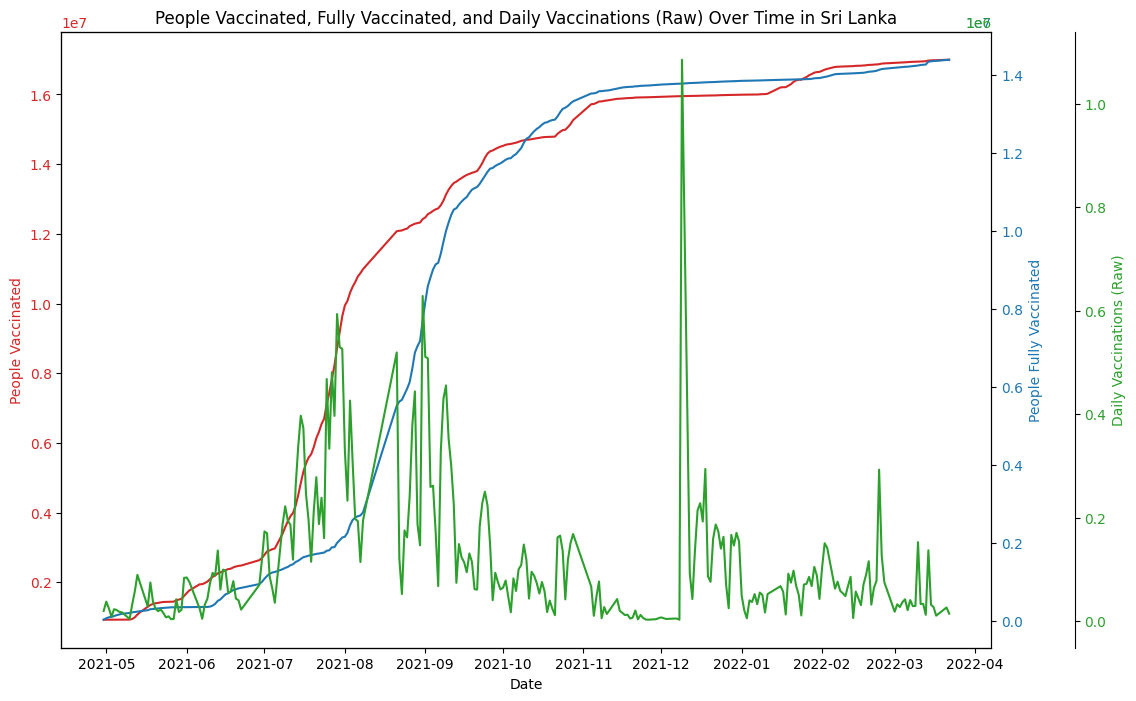

In [157]:
# Take user input for the country
selected_country = input("Enter the country name: ")

# Filter data for the selected country
country_data = dfc1[dfc1['country'].str.lower() == selected_country.lower()]

# Check if data for the selected country is available
if country_data.empty:
    print(f"No data available for {selected_country}. Please check the country name")
else:
    # Convert the 'date' column to datetime format
    country_data['date'] = pd.to_datetime(country_data['date'])

    # Plotting
    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Plotting people vaccinated
    color = 'tab:red'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('People Vaccinated', color=color)
    ax1.plot(country_data['date'], country_data['people_vaccinated'], label='People Vaccinated', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Creating a secondary y-axis for people fully vaccinated
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('People Fully Vaccinated', color=color)
    ax2.plot(country_data['date'], country_data['people_fully_vaccinated'], label='People Fully Vaccinated', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    # Creating a third y-axis for daily vaccinations (raw count)
    ax3 = ax1.twinx()
    color = 'tab:green'
    ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis
    ax3.set_ylabel('Daily Vaccinations (Raw)', color=color)
    ax3.plot(country_data['date'], country_data['daily_vaccinations_raw'], label='Daily Vaccinations (Raw)', color=color)
    ax3.tick_params(axis='y', labelcolor=color)

    plt.title(f'People Vaccinated, Fully Vaccinated, and Daily Vaccinations (Raw) Over Time in {selected_country}')
    plt.show()

## **Dataset 2: Vaccinations by Country and Manufacturer**

In [130]:
df2.head(2)

,location,date,vaccine,total_vaccinations
0,Argentina,2020-12-29,Moderna,2
1,Argentina,2020-12-29,Oxford/AstraZeneca,3


In [131]:
df2.columns.tolist()

['location', 'date', 'vaccine', 'total_vaccinations']

In [132]:
# List of columns to check for null values
columns_to_check2 = [
    'location',
    'date',
    'vaccine',
    'total_vaccinations'
    ]

# Check for null values in the specified columns
null_values2 = df2[columns_to_check2].isnull().sum()

# Display the result
print("Null values in each column:")
print(null_values2)

Null values in each column:
location              0
date                  0
vaccine               0
total_vaccinations    0
dtype: int64


In [133]:
# Drop rows with null values in the specified columns
dfc2 = df2.dropna(subset=columns_to_check2)

# Display the cleaned DataFrame
print("DataFrame after dropping null values:\n")
dfc2

DataFrame after dropping null values:



,location,date,vaccine,total_vaccinations
0,Argentina,2020-12-29,Moderna,2
1,Argentina,2020-12-29,Oxford/AstraZeneca,3
2,Argentina,2020-12-29,Sinopharm/Beijing,1
3,Argentina,2020-12-29,Sputnik V,20481
4,Argentina,2020-12-30,Moderna,2
...,...,...,...,...
35618,European Union,2022-03-29,Oxford/AstraZeneca,67403106
35619,European Union,2022-03-29,Pfizer/BioNTech,600519998
35620,European Union,2022-03-29,Sinopharm/Beijing,2301516
35621,European Union,2022-03-29,Sinovac,1809


In [134]:
print(df2.shape)
print(dfc2.shape)

(35623, 4)
(35623, 4)


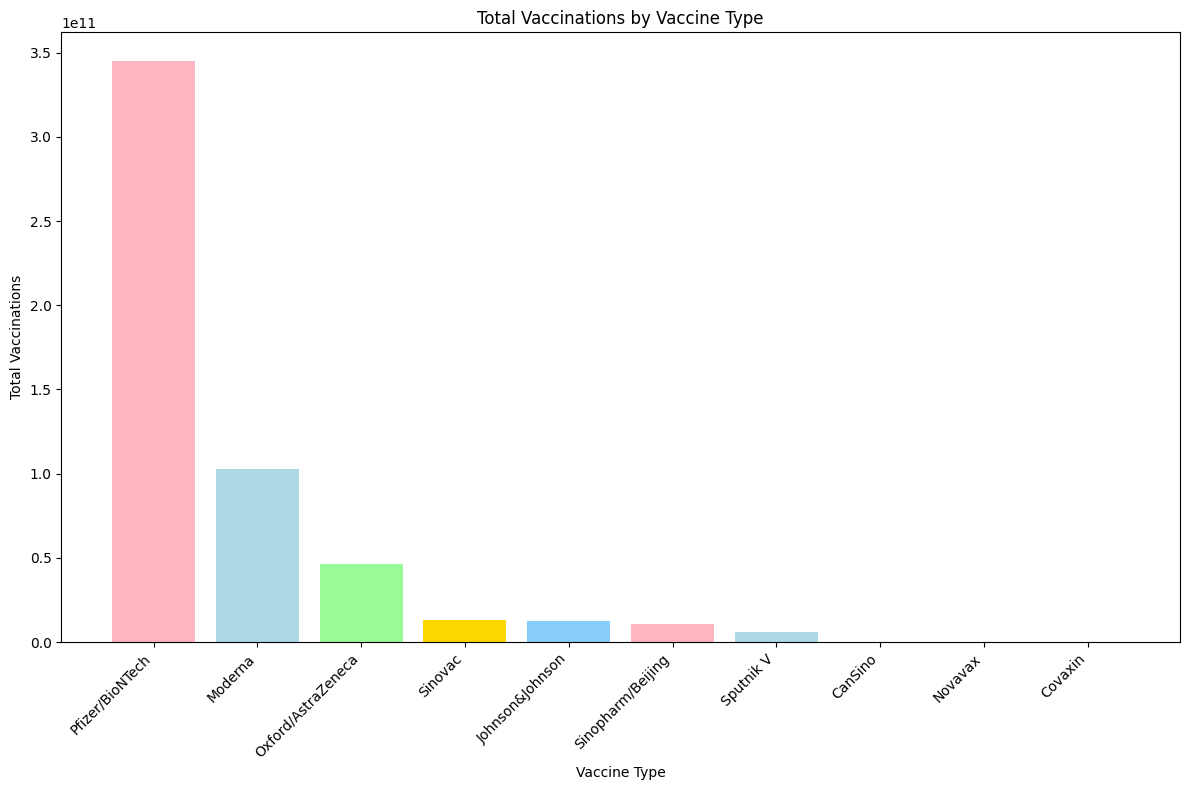

In [135]:
# Group data by country and sum total vaccinations
grouped_data = dfc2.groupby('vaccine')['total_vaccinations'].sum().reset_index()

# Sort data by total vaccinations in descending order for a better bar chart representation
grouped_data = grouped_data.sort_values(by='total_vaccinations', ascending=False)

# Define pastel colors
pastel_colors = ['#FFB6C1', '#ADD8E6', '#98FB98', '#FFD700', '#87CEFA']

# Plotting a bar chart with pastel colors
plt.figure(figsize=(12, 8))
plt.bar(grouped_data['vaccine'], grouped_data['total_vaccinations'], color=pastel_colors)
plt.xlabel('Vaccine Type')
plt.ylabel('Total Vaccinations')
plt.title('Total Vaccinations by Vaccine Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better spacing

# Show the plot
plt.show()

## **Dataset 3: Vaccinations**

In [136]:
df3.head(2)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Argentina,ARG,2020-12-29,700.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,Argentina,ARG,2020-12-30,NaN,NaN,NaN,NaN,15656.0,NaN,NaN,NaN,346.0


In [137]:
df3.columns.tolist()

['location',
 'iso_code',
 'date',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'daily_vaccinations_raw',
 'daily_vaccinations',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'daily_vaccinations_per_million']

In [138]:
# List of columns to check for null values
columns_to_check3 = [
    'location',
    'iso_code',
    'date',
    'total_vaccinations',
    'people_vaccinated',
    'people_fully_vaccinated',
    'daily_vaccinations_raw',
    'daily_vaccinations',
    'total_vaccinations_per_hundred',
    'people_vaccinated_per_hundred',
    'people_fully_vaccinated_per_hundred',
    'daily_vaccinations_per_million'
    ]

# Check for null values in the specified columns
null_values3 = df3[columns_to_check3].isnull().sum()

# Display the result
print("Null values in each column:")
print(null_values3)

Null values in each column:
location                                  0
iso_code                                209
date                                      0
total_vaccinations                      535
people_vaccinated                       587
people_fully_vaccinated                1266
daily_vaccinations_raw                  743
daily_vaccinations                       64
total_vaccinations_per_hundred          535
people_vaccinated_per_hundred           587
people_fully_vaccinated_per_hundred    1266
daily_vaccinations_per_million           64
dtype: int64


In [139]:
# Drop rows with null values in the specified columns
dfc3 = df3.dropna(subset=columns_to_check3)

# Display the cleaned DataFrame
print("DataFrame after dropping null values:\n")
dfc3

DataFrame after dropping null values:



,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
23,Argentina,ARG,2021-01-21,265724.0,249372.0,16352.0,17791.0,11704.0,0.59,0.55,0.04,259.0
24,Argentina,ARG,2021-01-22,279602.0,254456.0,25146.0,13878.0,11263.0,0.62,0.56,0.06,249.0
25,Argentina,ARG,2021-01-23,288064.0,258876.0,29188.0,8462.0,11124.0,0.64,0.57,0.06,246.0
26,Argentina,ARG,2021-01-24,292023.0,260036.0,31987.0,3959.0,10342.0,0.65,0.58,0.07,229.0
27,Argentina,ARG,2021-01-25,292386.0,260122.0,32264.0,363.0,9046.0,0.65,0.58,0.07,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1657,World,OWID_WRL,2021-01-22,61255730.0,56153916.0,4888346.0,3807434.0,3217799.0,0.79,0.72,0.06,413.0
1658,World,OWID_WRL,2021-01-23,64239590.0,58706844.0,5307411.0,2983860.0,3496797.0,0.82,0.75,0.07,449.0
1659,World,OWID_WRL,2021-01-24,66486960.0,60545098.0,5706619.0,2247370.0,3684343.0,0.85,0.78,0.07,473.0
1660,World,OWID_WRL,2021-01-25,69183821.0,62877454.0,6170793.0,2696861.0,3876634.0,0.89,0.81,0.08,497.0


In [140]:
print(df3.shape)
print(dfc3.shape)

(1662, 12)
(278, 12)


### **People Fully Vaccinated per Hundred People Comparison**

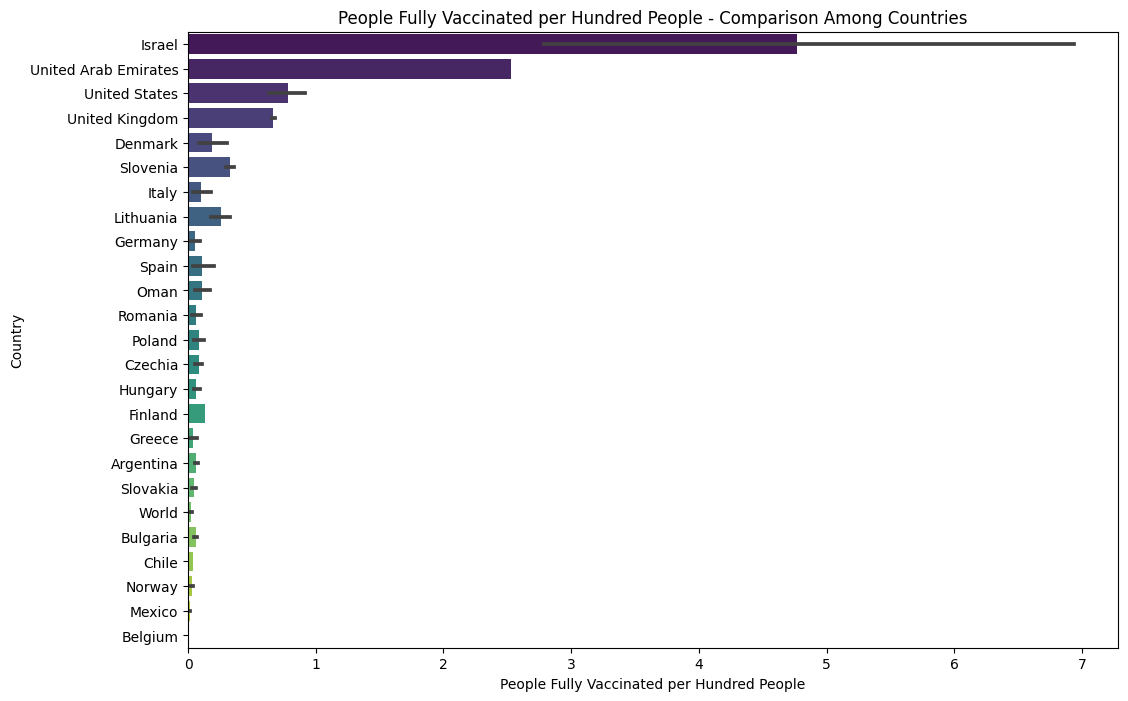

In [162]:
# Filter data for countries with non-null values for people fully vaccinated per hundred
countries_data = dfc3.dropna(subset=['people_fully_vaccinated_per_hundred'])

# Sort data by people fully vaccinated per hundred in descending order
sorted_data = countries_data.sort_values(by='people_fully_vaccinated_per_hundred', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='people_fully_vaccinated_per_hundred', y='location', data=sorted_data, palette='viridis')

plt.title('People Fully Vaccinated per Hundred People - Comparison Among Countries')
plt.xlabel('People Fully Vaccinated per Hundred People')
plt.ylabel('Country')
plt.show()